In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
!pip install nibabel

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [3]:
import nibabel as nib

In [4]:
# glob all sub-folders for anat* and nii.gz inside those folders
# Convert to images, dump all images in training data

In [5]:
# test out a few images to see if the 19th image is the same across all anat scans

In [6]:
data = nib.load(os.path.join('./OASIS3/OAS30001_MR_d0129/anat1/sub-OAS30001_ses-d0129_acq-TSE_T2w.nii.gz'))

In [7]:
data.shape

(256, 256, 36)

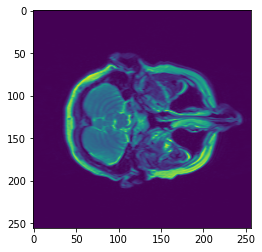

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data.get_fdata()[:,:,6])

In [9]:
data2 = nib.load(os.path.join('./OASIS3/OAS30001_MR_d0129/anat2/sub-OAS30001_ses-d0129_run-01_T1w.nii.gz'))

In [10]:
data2.shape

(176, 256, 256)

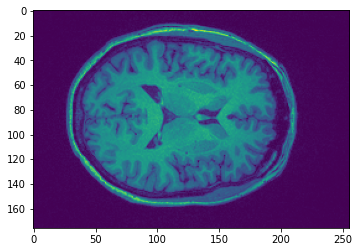

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.imshow(data2.get_fdata()[:,:,135])

In [12]:
print(data2.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 54
dim             : [  3 176 256 256   1   0   0   0]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.        0.9999976 1.        1.        2.4       0.        0.
 0.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'removed'
aux_file        : b'OAS30001_MR_d0129'
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.038428795
quatern_c       : 0.039625328
quatern_d       : 0.0051912516
qoffset_x       : -8

In [13]:
type(data2)

nibabel.nifti1.Nifti1Image

In [14]:
n = data2.get_fdata()

In [15]:
type(n)

numpy.ndarray

In [16]:
n.shape

(176, 256, 256)

In [17]:
n[:,:,153]

array([[2., 1., 3., ..., 1., 2., 0.],
       [3., 4., 2., ..., 1., 2., 0.],
       [4., 2., 2., ..., 4., 8., 0.],
       ...,
       [4., 2., 4., ..., 2., 2., 0.],
       [3., 2., 2., ..., 0., 1., 0.],
       [2., 2., 2., ..., 1., 1., 0.]])

In [18]:
n[:,:,135].shape

(176, 256)

In [19]:
# Can images be reshaped directly in numpy or need to downsize the image, then convert to numpy?

In [20]:
!apt update -y
!apt install libgl1-mesa-glx -y

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease          
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease                
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done 
Building dependency tree       
Reading state information... Done
63 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (20.0.8-0ubuntu1~18.04.1

In [21]:
!pip install opencv-python

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [30]:
!pip install -U scikit-image

     |████████████████████████████████| 12.4 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 4.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 3.7 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [22]:
import cv2
import numpy as np

In [33]:
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

In [28]:
img = cv2.imread(n[:,:,135])

SystemError: <built-in function imread> returned NULL without setting an error

In [34]:
image = color.rgb2gray(data.astronaut())

In [35]:
image.shape

(512, 512)

In [36]:
type(image)

numpy.ndarray

In [52]:
myimage = n[:,:,135]

In [53]:
type(myimage)

numpy.ndarray

In [54]:
myimage.shape

(176, 256)

In [58]:
# ref: https://scikit-image.org/docs/dev/auto_examples/transform/plot_rescale.html

In [55]:
image_rescaled = rescale(myimage, 0.25, anti_aliasing=False)

In [56]:
image_resized = resize(myimage, (28, 28), anti_aliasing=True)

Text(0.5, 1.0, 'Resized image (no aliasing)')

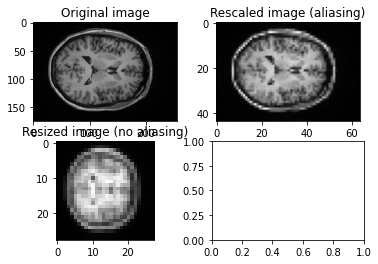

In [57]:
fig, axes = plt.subplots(nrows=2, ncols=2)
ax = axes.ravel()

ax[0].imshow(myimage, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

In [49]:
image_rescaled.shape

(44, 64)

In [50]:
image_resized.shape

(28, 28)